In [1]:
import math
import xarray as xr
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.path as mpath
import numpy as np
import cartopy.feature as cfeature
import pandas as pd
import geopandas as gpd
import folium
import os, shutil
from glob import glob
from landsatxplore.api import API
import traceback
from PIL import Image
from osgeo import gdal


In [2]:

july13_2016 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2016_07_13_L2W.nc')
july15_2016 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2016_07_15_L2W.nc')
july24_2016 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2016_07_24_L2W.nc')
july29_2016 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2016_07_29_L2W.nc')
aug5_2016 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2016_08_05_L2W.nc')
aug8_2016 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2016_08_07_L2W.nc')

july14_2017 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2017_07_14_L2W.nc')
aug1_2017 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2017_08_01_L2W.nc')
sept25_2017 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2017_09_25_L2W.nc')
sept27_2017 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2017_09_27_L2W.nc')

oct2_2018 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2018_10_02_L2W.nc')
oct7_2018 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2018_10_07_L2W.nc')
july7_2018 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/L8_OLI_2018_07_21_21_41_08_074010_L2W.nc')
july30_2018 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/L8_OLI_2018_07_30_21_35_02_073010_L2W.nc')
sept30_2018 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/L8_OLI_2018_09_30_21_47_50_075010_L2W.nc')

july4_2019 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/L8_OLI_2019_07_04_22_06_34_078010_L2W.nc')
july6_2019 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2019_07_06_L2W.nc')
july13_2019 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2019_07_13_L2W.nc')
sept8_2019 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2019_09_08_L2W.nc')
oct10_2019 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2019_10_10_L2W.nc')

july8_2020 =  xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2020_07_08_L2W.nc')
july15_2020 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2020_07_15_L2W.nc')
aug11_2020 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2020_08_11_L2W.nc')
aug25_2020 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2020_08_25_L2W.nc')
sept17_2020 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2020_09_17_L2W.nc')

aug7_2021 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/L8_OLI_2021_08_07_21_35_51_073010_L2W.nc')
aug23_2021 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2021_08_23_L2W.nc')

aug24_2022 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2022_08_24_L2W.nc')
aug25_2022 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2022_08_25_L2W.nc')
oct4_2022 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2022_10_04_L2W.nc')


In [3]:
print(oct4_2022.variables)

Frozen({'transverse_mercator': <xarray.Variable ()>
array(9.96921e+36)
Attributes: (12/16)
    crs_wkt:                           PROJCRS["unknown",BASEGEOGCRS["unknown...
    semi_major_axis:                   6378137.0
    semi_minor_axis:                   6356752.314245179
    inverse_flattening:                298.257223563
    reference_ellipsoid_name:          WGS 84
    longitude_of_prime_meridian:       0.0
    ...                                ...
    grid_mapping_name:                 transverse_mercator
    latitude_of_projection_origin:     0.0
    longitude_of_central_meridian:     -147.0
    false_easting:                     500000.0
    false_northing:                    0.0
    scale_factor_at_central_meridian:  0.9996, 'x': <xarray.IndexVariable 'x' (x: 8731)>
array([336885., 336915., 336945., ..., 598725., 598755., 598785.])
Attributes:
    standard_name:  projection_x_coordinate
    long_name:      x coordinate of projection
    units:          m, 'y': <xarray.Ind

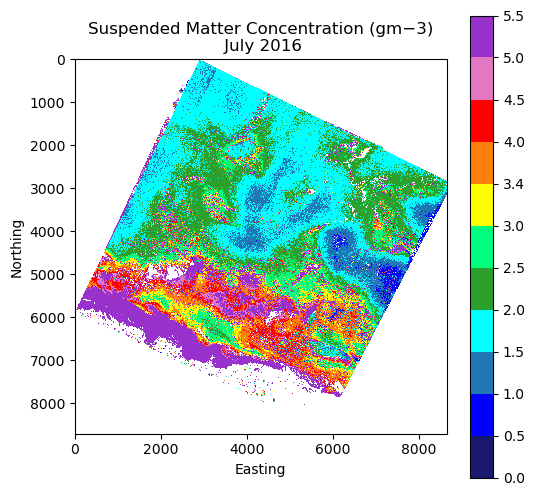

In [89]:

plt.figure(figsize=(6, 6))
# make a color map of fixed colors
#cmap = mpl.colors.ListedColormap(['midnightblue', 'blue','tab:blue','cyan','tab:green','springgreen','yellow', 'tab:orange', 'red', 'tab:pink', 'darkorchid'])
#bounds=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.4, 4, 4.5, 5, 5.5]
cmap = mpl.colors.ListedColormap(['midnightblue', 'blue','tab:blue','cyan','tab:green','springgreen','yellow', 'tab:orange', 'red', 'tab:pink', 'darkorchid'])
bounds=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.4, 4, 4.5, 5, 5.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

 #tell imshow about color map so that only set colors are used
img = plt.imshow(july15_2016.SPM_Nechad2016_655, interpolation='none',
                    cmap = cmap, norm=norm)
img = plt.imshow(july13_2016.SPM_Nechad2016_655, interpolation='none',
                    cmap = cmap, norm=norm)
img = plt.imshow(july29_2016.SPM_Nechad2016_655, interpolation='none',
                    cmap = cmap, norm=norm)
img = plt.imshow(july24_2016.SPM_Nechad2016_655, interpolation='none',
                    cmap = cmap, norm=norm)

#img = plt.imshow(aug5_2016.SPM_Nechad2016_655, interpolation='none',
#                   cmap = cmap, norm=norm)
#img = plt.imshow(aug8_2016.SPM_Nechad2016_655, interpolation='none',
#                    cmap = cmap, norm=norm)

#img = plt.imshow(july14_2017.SPM_Nechad2016_655, interpolation='none',
#                    cmap = cmap, norm=norm)

#img = plt.imshow(aug1_2017.SPM_Nechad2016_655, interpolation='none',
#                    cmap = cmap, norm=norm)

#img = plt.imshow(sept25_2017.SPM_Nechad2016_655, interpolation='none',
#                   cmap = cmap, norm=norm)
#img = plt.imshow(sept27_2017.SPM_Nechad2016_655, interpolation='none',
#                    cmap = cmap, norm=norm)

#img = plt.imshow(july7_2018.SPM_Nechad2016_655, interpolation='none',
#                   cmap = cmap, norm=norm)
#img = plt.imshow(july30_2018.SPM_Nechad2016_655, interpolation='none',
#                    cmap = cmap, norm=norm)

#img = plt.imshow(sept30_2018.SPM_Nechad2016_655, interpolation='none',
#                    cmap = cmap, norm=norm)

#img = plt.imshow(oct2_2018.SPM_Nechad2016_655, interpolation='none',
#                   cmap = cmap, norm=norm)
#img = plt.imshow(oct7_2018.SPM_Nechad2016_655, interpolation='none',
#                    cmap = cmap, norm=norm)

#img = plt.imshow(july4_2019.SPM_Nechad2016_655, interpolation='none',
#                   cmap = cmap, norm=norm)
#img = plt.imshow(july6_2019.SPM_Nechad2016_655, interpolation='none',
#                    cmap = cmap, norm=norm)
#img = plt.imshow(july13_2019.SPM_Nechad2016_655, interpolation='none',
#                    cmap = cmap, norm=norm)

#img = plt.imshow(sept8_2019.SPM_Nechad2016_655, interpolation='none',
#                   cmap = cmap, norm=norm)

#img = plt.imshow(oct10_2019.SPM_Nechad2016_655, interpolation='none',
#                    cmap = cmap, norm=norm)

#img = plt.imshow(july8_2020.SPM_Nechad2016_655, interpolation='none',
#                    cmap = cmap, norm=norm)
#img = plt.imshow(july15_2020.SPM_Nechad2016_655, interpolation='none',
#                    cmap = cmap, norm=norm)

#img = plt.imshow(aug11_2020.SPM_Nechad2016_655, interpolation='none',
#                    cmap = cmap, norm=norm)
#img = plt.imshow(aug25_2020.SPM_Nechad2016_655, interpolation='none',
#                    cmap = cmap, norm=norm)

#img = plt.imshow(sept17_2020.SPM_Nechad2016_655, interpolation='none',
#                    cmap = cmap, norm=norm)

#img = plt.imshow(aug7_2021.SPM_Nechad2016_655, interpolation='none',
#                    cmap = cmap, norm=norm)
#img = plt.imshow(aug23_2021.SPM_Nechad2016_655, interpolation='none',
#                    cmap = cmap, norm=norm)

#img = plt.imshow(aug24_2022.SPM_Nechad2016_654, interpolation='none',
#                    cmap = cmap, norm=norm)
#img = plt.imshow(aug25_2022.SPM_Nechad2016_654, interpolation='none',
#                   cmap = cmap, norm=norm)

#img = plt.imshow(oct4_2022.SPM_Nechad2016_654, interpolation='none',
#                    cmap = cmap, norm=norm)

# make a color bar
plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.4, 4, 4.5, 5, 5.5])
plt.xlabel("Easting")
plt.ylabel("Northing")
#plt.title("Chlorophyll Concentration (µg/l) October 2022\n (3 bands)")
plt.title("Suspended Matter Concentration (gm−3)\n July 2016")
plt.show()


In [3]:
#print(july13_2016.chl_oc2.shape)
#print(july15_2016.chl_oc2.shape)
#print(july24_2016.chl_oc2.shape)
#print(july29_2016.chl_oc2.shape)
#print(july6_2019.chl_oc2.shape)
#print(july13_2019.chl_oc2.shape)
#print(aug1_2017.chl_oc2.shape)
#print(sept30_2018.chl_oc2.shape)
#print(oct10_2019.chl_oc2.shape)

print('July 14 2017: ', july14_2017.chl_oc2.shape)
print('July 7 2018', july7_2018.chl_oc2.shape)
print('July 30 2018: ', july30_2018.chl_oc2.shape)
print('July 4 2019', july4_2019.chl_oc2.shape)
print('July 15 2020: ', july15_2020.chl_oc2.shape)
print('Aug 5 2016:', aug5_2016.chl_oc2.shape)
print('Aug 7 2021:', aug7_2021.chl_oc2.shape)
print('Aug 11 2020:', aug11_2020.chl_oc2.shape)
print('Aug 25 2022:', aug25_2022.chl_oc2.shape)
print('Aug 23 2021:', aug23_2021.chl_oc2.shape)
print('Aug 24 2022:', aug24_2022.chl_oc2.shape)
print('Aug 25 2022:', aug25_2022.chl_oc2.shape)
print('Sept 25 2017:', sept25_2017.chl_oc2.shape)
print('Sept 27 2017:', sept27_2017.chl_oc2.shape)
print('Sept 8 2019:', sept8_2019.chl_oc2.shape)
print('Sept 17 2020:', sept17_2020.chl_oc2.shape)
print('Oct 2 2018:', oct2_2018.chl_oc2.shape)
print('Oct 7 2018:', oct7_2018.chl_oc2.shape)
print('Oct 4 2022:', oct4_2022.chl_oc2.shape)



July 14 2017:  (8771, 8731)
July 7 2018 (8761, 8731)
July 30 2018:  (8701, 8651)
July 4 2019 (8771, 8731)
July 15 2020:  (8711, 8661)
Aug 5 2016: (8701, 8661)
Aug 7 2021: (8701, 8651)
Aug 11 2020: (8761, 8731)
Aug 25 2022: (8761, 8731)
Aug 23 2021: (8701, 8651)
Aug 24 2022: (8831, 8801)
Aug 25 2022: (8761, 8731)
Sept 25 2017: (8711, 8671)
Sept 27 2017: (8831, 8801)
Sept 8 2019: (8631, 8581)
Sept 17 2020: (8711, 8661)
Oct 2 2018: (8701, 8651)
Oct 7 2018: (8631, 8581)
Oct 4 2022: (8761, 8731)


In [4]:
            
lat_07_13_16 = july13_2016.lat.values
lon_07_13_16 = july13_2016.lon.values
c2_07_13_16 = july13_2016.chl_oc2.values
#(8631, 8581)

lat_07_15_16 = july15_2016.lat.values
lon_07_15_16 = july15_2016.lon.values
c2_07_15_16 = july15_2016.chl_oc2.values
#(8761, 8721)

lat_07_24_16 = july24_2016.lat.values
lon_07_24_16 = july24_2016.lon.values
c2_07_24_16 = july24_2016.chl_oc2.values
#(8701, 8651)

lat_07_29_16 = july29_2016.lat.values
lon_07_29_16 = july29_2016.lon.values
c2_07_29_16 = july29_2016.chl_oc2.values
#(8631, 8591)

lat_07_06_19 = july6_2019.lat.values
lon_07_06_19 = july6_2019.lon.values
c2_07_06_19 = july6_2019.chl_oc2.values
#(8631, 8581)

lat_07_13_19 = july13_2019.lat.values
lon_07_13_19 = july13_2019.lon.values
c2_07_13_19 = july13_2019.chl_oc2.values
#(8631, 8581)

lat_08_01_17 = aug1_2017.lat.values
lon_08_01_17 = aug1_2017.lon.values
c2_08_01_17 = aug1_2017.chl_oc2.values
#(8631, 8591)

lat_09_30_18 = sept30_2018.lat.values
lon_09_30_18 = sept30_2018.lon.values
c2_09_30_18 = sept30_2018.chl_oc2.values
#(8841, 8791)

lat_10_10_19 = oct10_2019.lat.values
lon_10_10_19 = oct10_2019.lon.values
c2_10_10_19 = oct10_2019.chl_oc2.values
#(8631, 8591)

lat_07_14_17 = july14_2017.lat.values
lon_07_14_17 = july14_2017.lon.values
c2_07_14_17 = july14_2017.chl_oc2.values
# (8771, 8731)

lat_07_04_19 = july4_2019.lat.values
lon_07_04_19 = july4_2019.lon.values
c2_07_04_19 = july4_2019.chl_oc2.values
#(8771, 8731)

lat_07_07_18 = july7_2018.lat.values
lon_07_07_18 = july7_2018.lon.values
c2_07_07_18 = july7_2018.chl_oc2.values
#(8761, 8731)

lat_07_30_18 = july30_2018.lat.values
lon_07_30_18 = july30_2018.lon.values
c2_07_30_18 = july30_2018.chl_oc2.values
#(8701, 8651)

lat_07_15_20 = july15_2020.lat.values
lon_07_15_20 = july15_2020.lon.values
c2_07_15_20 = july15_2020.chl_oc2.values
# (8711, 8661)

lat_08_05_16 = aug5_2016.lat.values
lon_08_05_16 = aug5_2016.lon.values
c2_08_05_16 = aug5_2016.chl_oc2.values
# (8701, 8661)

lat_08_07_21 = aug7_2021.lat.values
lon_08_07_21 = aug7_2021.lon.values
c2_08_07_21 = aug7_2021.chl_oc2.values
# (8701, 8651)

lat_08_11_20 = aug11_2020.lat.values
lon_08_11_20 = aug11_2020.lon.values
c2_08_11_20 = aug11_2020.chl_oc2.values
# (8761, 8731)

lat_08_25_22 = aug25_2022.lat.values
lon_08_25_22 = aug25_2022.lon.values
c2_08_25_22 = aug25_2022.chl_oc2.values
# (8761, 8731)

lat_08_23_21 = aug23_2021.lat.values
lon_08_23_21 = aug23_2021.lon.values
c2_08_23_21 = aug23_2021.chl_oc2.values
# (8701, 8651)

lat_08_24_22 = aug24_2022.lat.values
lon_08_24_22 = aug24_2022.lon.values
c2_08_24_22 = aug24_2022.chl_oc2.values
# (8831, 8801)

lat_08_25_22 = aug25_2022.lat.values
lon_08_25_22 = aug25_2022.lon.values
c2_08_25_22 = aug25_2022.chl_oc2.values
# ((8761, 8731)

lat_09_25_17 = sept25_2017.lat.values
lon_09_25_17 = sept25_2017.lon.values
c2_09_25_17 = sept25_2017.chl_oc2.values
# (8711, 8671)

lat_09_27_17 = sept27_2017.lat.values
lon_09_27_17 = sept27_2017.lon.values
c2_09_27_17 = sept27_2017.chl_oc2.values
# (8831, 8801)

lat_09_08_19 = sept8_2019.lat.values
lon_09_08_19 = sept8_2019.lon.values
c2_09_08_19 = sept8_2019.chl_oc2.values
#(8631, 8581)

lat_09_17_20 = sept17_2020.lat.values
lon_09_17_20 = sept17_2020.lon.values
c2_09_17_20 = sept17_2020.chl_oc2.values
# (8711, 8661)

lat_10_02_18 = oct2_2018.lat.values
lon_10_02_18 = oct2_2018.lon.values
c2_10_02_18 = oct2_2018.chl_oc2.values
# (8701, 8651)

lat_10_07_18 = oct7_2018.lat.values
lon_10_07_18 = oct7_2018.lon.values
c2_10_07_18 = oct7_2018.chl_oc2.values
#(8631, 8581)

lat_10_04_22 = oct4_2022.lat.values
lon_10_04_22 = oct4_2022.lon.values
c2_10_04_22 = oct4_2022.chl_oc2.values
# (8761, 8731)



In [8]:

new_chl2_07_13_16 = np.zeros((len(lat_07_13_16), len(lon_07_13_16)))
new_chl2_07_13_16 [:]=np.nan
new_chl2_07_15_16 = np.zeros((len(lat_07_15_16), len(lon_07_15_16)))
new_chl2_07_15_16 [:]=np.nan
new_chl2_07_24_16 = np.zeros((len(lat_07_24_16), len(lon_07_24_16)))
new_chl2_07_24_16 [:]=np.nan
new_chl2_07_29_16 = np.zeros((len(lat_07_29_16), len(lon_07_29_16)))
new_chl2_07_29_16 [:]=np.nan
new_chl2_07_06_19 = np.zeros((len(lat_07_06_19), len(lon_07_06_19)))
new_chl2_07_06_19 [:]=np.nan
new_chl2_07_13_19 = np.zeros((len(lat_07_13_19), len(lon_07_13_19)))
new_chl2_07_13_19 [:]=np.nan
new_chl2_08_01_17 = np.zeros((len(lat_08_01_17), len(lon_08_01_17)))
new_chl2_08_01_17 [:]=np.nan
new_chl2_09_30_18 = np.zeros((len(lat_09_30_18), len(lon_09_30_18)))
new_chl2_09_30_18 [:]=np.nan
new_chl2_10_10_19 = np.zeros((len(lat_10_10_19), len(lon_10_10_19)))
new_chl2_10_10_19 [:]=np.nan


MemoryError: Unable to allocate 568. MiB for an array with shape (8631, 8631) and data type float64

In [ ]:
new_chl2_07_14_17 = np.zeros((len(lat_07_14_17), len(lon_07_14_17)))
new_chl2_07_14_17 [:]=np.nan
new_chl2_07_04_19 = np.zeros((len(lat_07_04_19), len(lon_07_04_19)))
new_chl2_07_04_19 [:]=np.nan
new_chl2_07_07_18 = np.zeros((len(lat_07_07_18), len(lon_07_07_18)))
new_chl2_07_07_18 [:]=np.nan
new_chl2_07_30_18 = np.zeros((len(lat_07_30_18), len(lon_07_30_18)))
new_chl2_07_30_18 [:]=np.nan
new_chl2_07_15_20 = np.zeros((len(lat_07_15_20), len(lon_07_15_20)))
new_chl2_07_15_20 [:]=np.nan
new_chl2_08_05_16 = np.zeros((len(lat_08_05_16), len(lon_08_05_16)))
new_chl2_08_05_16 [:]=np.nan
new_chl2_08_07_21 = np.zeros((len(lat_08_07_21), len(lon_08_07_21)))
new_chl2_08_07_21 [:]=np.nan
new_chl2_08_11_20 = np.zeros((len(lat_08_11_20), len(lon_08_11_20)))
new_chl2_08_11_20 [:]=np.nan
new_chl2_08_25_22 = np.zeros((len(lat_08_25_22), len(lon_08_25_22)))
new_chl2_08_25_22 [:]=np.nan
new_chl2_08_23_21 = np.zeros((len(lat_08_23_21), len(lon_08_23_21)))
new_chl2_08_23_21 [:]=np.nan
new_chl2_08_24_22 = np.zeros((len(lat_08_24_22), len(lon_08_24_22)))
new_chl2_08_24_22 [:]=np.nan
new_chl2_08_25_22 = np.zeros((len(lat_08_25_22), len(lon_08_25_22)))
new_chl2_08_25_22 [:]=np.nan
new_chl2_09_25_17 = np.zeros((len(lat_09_25_17), len(lon_09_25_17)))
new_chl2_09_25_17 [:]=np.nan
new_chl2_09_27_17 = np.zeros((len(lat_09_27_17), len(lon_09_27_17)))
new_chl2_09_27_17 [:]=np.nan
new_chl2_09_08_19 = np.zeros((len(lat_09_08_19), len(lon_09_08_19)))
new_chl2_09_08_19 [:]=np.nan
new_chl2_09_17_20 = np.zeros((len(lat_09_17_20), len(lon_09_17_20)))
new_chl2_09_17_20 [:]=np.nan
new_chl2_10_02_18 = np.zeros((len(lat_10_02_18), len(lon_10_02_18)))
new_chl2_10_02_18 [:]=np.nan
new_chl2_10_07_18 = np.zeros((len(lat_10_07_18), len(lon_10_07_18)))
new_chl2_10_07_18 [:]=np.nan
new_chl2_10_04_22 = np.zeros((len(lat_10_04_22), len(lon_10_04_22)))
new_chl2_10_04_22 [:]=np.nan

In [ ]:
for x in range(0,8771):
    for y in range(0,8731):
            if c2_07_14_17[x,y] <= 5.49:
                new_chl2_07_14_17[x,y] = c2_07_14_17[x,y]

chl2_07_14_17 = np.nanmean(new_chl2_07_14_17)
print(chl2_07_14_17)

for x in range(0,8771):
    for y in range(0,8731):
            if c2_07_04_19[x,y] <= 5.49:
                new_chl2_07_04_19[x,y] = c2_07_04_19[x,y]

chl2_07_04_19 = np.nanmean(new_chl2_07_04_19)
print(chl2_07_04_19)


for x in range(0,8761):
    for y in range(0,8731):
            if c2_07_07_18[x,y] <= 5.49:
                new_chl2_07_07_18[x,y] = c2_07_07_18[x,y]

chl2_07_07_18 = np.nanmean(new_chl2_07_07_18)
print(chl2_07_07_18)

for x in range(0,8701):
    for y in range(0,8651):
            if c2_07_30_18[x,y] <= 5.49:
                new_chl2_07_30_18[x,y] = c2_07_30_18[x,y]

chl2_07_30_18 = np.nanmean(new_chl2_07_30_18)
print(chl2_07_30_18)

for x in range(0,8711):
    for y in range(0,8661):
            if c2_07_15_20[x,y] <= 5.49:
                new_chl2_07_15_20[x,y] = c2_07_15_20[x,y]

chl2_07_15_20 = np.nanmean(new_chl2_07_15_20)
print(chl2_07_15_20)

for x in range(0,8701):
    for y in range(0,8661):
            if c2_08_05_16[x,y] <= 5.49:
                new_chl2_08_05_16[x,y] = c2_08_05_16[x,y]

chl2_08_05_16 = np.nanmean(new_chl2_08_05_16)
print(chl2_08_05_16)

for x in range(0,8701):
    for y in range(0,8651):
            if c2_08_07_21[x,y] <= 5.49:
                new_chl2_08_07_21[x,y] = c2_08_07_21[x,y]

chl2_08_07_21 = np.nanmean(new_chl2_08_07_21)
print(chl2_08_07_21)

for x in range(0,8761):
    for y in range(0,8731):
            if c2_08_11_20[x,y] <= 5.49:
                new_chl2_08_11_20[x,y] = c2_08_11_20[x,y]

chl2_08_11_20 = np.nanmean(new_chl2_08_11_20)
print(chl2_08_11_20)

for x in range(0,8761):
    for y in range(0,8731):
            if c2_08_25_22[x,y] <= 5.49:
                new_chl2_08_25_22[x,y] = c2_08_25_22[x,y]

chl2_08_25_22 = np.nanmean(new_chl2_08_25_22)
print(chl2_08_25_22)

for x in range(0,8701):
    for y in range(0,8651):
            if c2_08_23_21[x,y] <= 5.49:
                new_chl2_08_23_21[x,y] = c2_08_23_21[x,y]

chl2_08_23_21 = np.nanmean(new_chl2_08_23_21)
print(chl2_08_23_21)

for x in range(0,8831):
    for y in range(0,8801):
            if c2_08_24_22[x,y] <= 5.49:
                new_chl2_08_24_22[x,y] = c2_08_24_22[x,y]

chl2_08_24_22 = np.nanmean(new_chl2_08_24_22)
print(chl2_08_24_22)
               
for x in range(0,8761):
    for y in range(0,8731):
            if c2_08_25_22[x,y] <= 5.49:
                new_chl2_08_25_22[x,y] = c2_08_25_22[x,y]

chl2_08_25_22 = np.nanmean(new_chl2_08_25_22)
print(chl2_08_25_22)

for x in range(0,8711):
    for y in range(0,8671):
            if c2_09_25_17[x,y] <= 5.49:
                new_chl2_09_25_17[x,y] = c2_09_25_17[x,y]

chl2_09_25_17 = np.nanmean(new_chl2_09_25_17)
print(chl2_09_25_17)            
               
for x in range(0,8831):
    for y in range(0,8801):
            if c2_09_27_17[x,y] <= 5.49:
                new_chl2_09_27_17[x,y] = c2_09_27_17[x,y]

chl2_09_27_17 = np.nanmean(new_chl2_09_27_17)
print(chl2_09_27_17)   

for x in range(0,8631):
    for y in range(0, 8581):
            if c2_09_08_19[x,y] <= 5.49:
                new_chl2_09_08_19[x,y] = c2_09_08_19[x,y]

chl2_09_08_19 = np.nanmean(new_chl2_09_08_19)
print(chl2_09_08_19)   

for x in range(0,8711):
    for y in range(0,  8661):
            if c2_09_17_20[x,y] <= 5.49:
                new_chl2_09_17_20[x,y] = c2_09_17_20[x,y]

chl2_09_17_20 = np.nanmean(new_chl2_09_17_20)
print(chl2_09_17_20)   

for x in range(0,8701):
    for y in range(0, 8651):
            if c2_10_02_18[x,y] <= 5.49:
                new_chl2_10_02_18[x,y] = c2_10_02_18[x,y]

chl2_10_02_18 = np.nanmean(new_chl2_10_02_18)
print(chl2_10_02_18)   

for x in range(0,8631):
    for y in range(0, 8581):
            if c2_10_07_18[x,y] <= 5.49:
                new_chl2_10_07_18[x,y] = c2_10_07_18[x,y]

chl2_10_07_18 = np.nanmean(new_chl2_10_07_18)
print(chl2_10_07_18)   

for x in range(0,8761):
    for y in range(0, 8731):
            if c2_10_04_22[x,y] <= 5.49:
                new_chl2_10_04_22[x,y] = c2_10_04_22[x,y]

chl2_10_04_22 = np.nanmean(new_chl2_10_04_22)
print(chl2_10_04_22)  


In [5]:
for x in range(0,8631):
    for y in range(0,8581):
            if c2_07_13_16[x,y] <= 5.49:
                new_chl2_07_13_16[x,y] = c2_07_13_16[x,y]

chl2_07_03_16 = np.nanmean(new_chl2_07_13_16)
#print(chl2_07_03_16)

for x in range(0,8761):
    for y in range(0, 8721):
            if c2_07_15_16[x,y] <= 5.49:
                new_chl2_07_15_16[x,y] = c2_07_15_16[x,y]

chl2_07_15_16 = np.nanmean(new_chl2_07_15_16)
#print(chl2_07_15_16)

for x in range(0,8701):
    for y in range(0, 8651):
            if c2_07_24_16[x,y] <= 5.49:
                new_chl2_07_24_16[x,y] = c2_07_24_16[x,y]

chl2_07_24_16 = np.nanmean(new_chl2_07_24_16)
#print(chl2_07_24_16)

for x in range(0,8631):
    for y in range(0, 8591):
            if c2_07_29_16[x,y] <= 5.49:
                new_chl2_07_29_16[x,y] = c2_07_29_16[x,y]

chl2_07_29_16 = np.nanmean(new_chl2_07_29_16)
print(chl2_07_29_16)

for x in range(0, 8631):
    for y in range(0, 8581):
            if c2_07_06_19[x,y] <= 5.49:
                new_chl2_07_06_19[x,y] = c2_07_06_19[x,y]

chl2_07_06_19 = np.nanmean(new_chl2_07_06_19)
#print(chl2_07_06_19)

for x in range(0, 8631):
    for y in range(0, 8581):
            if c2_07_13_19[x,y] <= 5.49:
                new_chl2_07_13_19[x,y] = c2_07_13_19[x,y]

chl2_07_13_19 = np.nanmean(new_chl2_07_13_19)
#print(chl2_07_13_19)

for x in range(0, 8631):
    for y in range(0, 8591):
            if c2_08_01_17[x,y] <= 5.49:
                new_chl2_08_01_17[x,y] = c2_08_01_17[x,y]

chl2_08_01_17 = np.nanmean(new_chl2_08_01_17)
#print(chl2_08_01_17)

for x in range(0,8841):
    for y in range(0, 8791):
            if c2_09_30_18[x,y] <= 5.49:
                new_chl2_09_30_18[x,y] = c2_09_30_18[x,y]

for x in range(0, 8631):
    for y in range(0, 8591):
            if c2_10_10_19[x,y] <= 5.49:
                new_chl2_10_10_19[x,y] = c2_10_10_19[x,y]

chl2_10_10_19 = np.nanmean(new_chl2_10_10_19)
print('last one:', chl2_10_10_19)

1.599673858584275
1.0776089971818283
0.9564413272580005
1.0154239255339144
1.783970163381241
1.344206887016298
1.397388232349605
last one: 2.100514239177237


In [9]:
#chl2 mean
chl2_07_13_16 = np.nanmean(new_chl2_07_13_16)
chl2_07_15_16 = np.nanmean(new_chl2_07_15_16)
chl2_07_24_16 = np.nanmean(new_chl2_07_24_16)
chl2_07_29_16 = np.nanmean(new_chl2_07_29_16)
chl2_07_14_17 = np.nanmean(july14_2017.chl_oc2)
chl2_07_07_18 = np.nanmean(july7_2018.chl_oc2) ###
chl2_07_30_18 = np.nanmean(july30_2018.chl_oc2) ###
chl2_07_04_19 = np.nanmean(july4_2019.chl_oc2) ###
chl2_07_06_19 = np.nanmean(new_chl2_07_06_19) 
chl2_07_13_19 = np.nanmean(new_chl2_07_13_19)
chl2_07_08_20 = np.nanmean(july8_2020.chl_oc2)
chl2_07_15_20 = np.nanmean(july15_2020.chl_oc2)
chl2_08_05_16 = np.nanmean(aug5_2016.chl_oc2)
chl2_08_08_16 = np.nanmean(aug8_2016.chl_oc2)
chl2_08_01_17 = np.nanmean(new_chl2_08_01_17)
chl2_08_07_21 = np.nanmean(aug7_2021.chl_oc2) ####
chl2_08_11_20 = np.nanmean(aug11_2020.chl_oc2)
chl2_08_25_21 = np.nanmean(aug25_2020.chl_oc2)
chl2_08_23_21 = np.nanmean(aug23_2021.chl_oc2)
chl2_08_24_22 = np.nanmean(aug24_2022.chl_oc2)
chl2_08_25_22 = np.nanmean(aug25_2022.chl_oc2)
chl2_09_25_17 = np.nanmean(sept25_2017.chl_oc2)
chl2_09_27_17 = np.nanmean(sept27_2017.chl_oc2)
chl2_09_30_18 = np.nanmean(new_chl2_09_30_18) ###
chl2_09_08_19 = np.nanmean(sept8_2019.chl_oc2) 
chl2_09_17_20 = np.nanmean(sept17_2020.chl_oc2)
chl2_10_02_18 = np.nanmean(oct2_2018.chl_oc2) 
chl2_10_07_18 = np.nanmean(oct7_2018.chl_oc2)
chl2_10_10_19 = np.nanmean(new_chl2_10_10_19) 
chl2_10_04_22 = np.nanmean(oct4_2022.chl_oc2) 

#print(chl2_07_14_17)
#print(chl2_07_07_18)
#print(chl2_07_04_19)
#print(chl2_08_07_21)
#print('Sept2018:', chl2_09_30_18)
print('July2016:',chl2_07_13_16)
print('July2016:',chl2_07_15_16)
print('July2016:',chl2_07_24_16)
print('July2016:',chl2_07_29_16)
#print('\nJuly2017 ok:',chl2_07_14_17)
#print('July2019:', chl2_07_06_19)
#print('July2019:', chl2_07_13_19)
#print(chl2_07_08_20)
#print(chl2_07_15_20)
#print(chl2_08_05_16)
#print('\nAug2016 ok: ', chl2_08_08_16)
#print('Aug2017:',chl2_08_01_17)
#print(chl2_08_11_20)
#print(chl2_08_25_21)
#print(chl2_08_23_21)
#print(chl2_08_24_22)
#print(chl2_08_25_22)
#print(chl2_09_25_17)
#print(chl2_09_27_17)
#print(chl2_09_08_19)
#print(chl2_09_17_20)
#print(chl2_10_02_18)
#print(chl2_10_07_18)
#print('Oct2019:', chl2_10_10_19)
#print('\nOct2022 ok: ', chl2_10_04_22)

#redo without non reflectance datasets
chl2_jul16_mean = (chl2_07_13_16 + chl2_07_15_16 + chl2_07_24_16 + chl2_07_29_16) / 4
print('chl2_July2016 mean:', chl2_jul16_mean)

chl2_jul17_mean = (chl2_07_14_17 + chl2_07_14_17) /2
print('chl2_July2017 mean:', chl2_jul17_mean)

chl2_jul18_mean = chl2_07_07_18
print('chl2_July2018 mean:', chl2_jul18_mean)

chl2_jul19_mean = (chl2_07_06_19 + chl2_07_13_19 + chl2_07_04_19) / 3
print('chl2_July2019 mean:', chl2_jul19_mean)

chl2_jul20_mean = (chl2_07_08_20 +chl2_07_15_20) / 2
print('chl2_July2020 mean:', chl2_jul20_mean)

chl2_aug16_mean = (chl2_08_05_16 + chl2_08_08_16) /2 
print('chl2_Aug2016 mean:', chl2_aug16_mean)

chl2_aug17_mean = chl2_08_01_17
print('chl2_Aug2017 mean:', chl2_aug17_mean)

chl2_aug20_mean = chl2_08_11_20
print('chl2_Aug2020 mean:', chl2_aug20_mean)

chl2_aug21_mean = (chl2_08_25_21 + chl2_08_23_21 + chl2_08_07_21) / 3
print('chl2_Aug2021 mean:', chl2_aug21_mean)

chl2_aug22_mean = (chl2_08_24_22 + chl2_08_25_22) / 2
print('chl2_Aug2022 mean:', chl2_aug22_mean)

chl2_sept17_mean = (chl2_09_25_17 + chl2_09_27_17) /2
print('chl2_Spet2017 mean:', chl2_sept17_mean)

chl2_sept18_mean = chl2_09_30_18
print('chl2_Spet2018 mean:', chl2_sept18_mean)

chl2_sept20_mean = chl2_09_17_20
print('chl2_Sept2020 mean:', chl2_sept20_mean)

chl2_oct18_mean = (chl2_10_02_18 + chl2_10_07_18) / 2
print('chl2_Oct2018 mean:', chl2_oct18_mean)

chl2_oct19_mean = chl2_10_10_19
print('chl2_Oct19 mean:', chl2_oct19_mean)

chl2_oct22_mean =chl2_10_04_22
print('chl2_Oct2022 mean:', chl2_oct22_mean)


July2016: 1.599673858584275
July2016: 1.0776089971818283
July2016: 0.9564413272580005
July2016: 1.0154239255339144
chl2_July2016 mean: 1.1622870271395045
chl2_July2017 mean: 4.929542541503906
chl2_July2018 mean: 3.3144274
chl2_July2019 mean: 3.838263444373783e+19
chl2_July2020 mean: 1.754496455192566
chl2_Aug2016 mean: 5.0208539962768555
chl2_Aug2017 mean: 1.397388232349605
chl2_Aug2020 mean: 1.2421256
chl2_Aug2021 mean: 1.049902121225993
chl2_Aug2022 mean: 1.6166056394577026
chl2_Spet2017 mean: 1.6796258687973022
chl2_Spet2018 mean: 1.5093047907276025
chl2_Sept2020 mean: 1.4970126
chl2_Oct2018 mean: 1.3594601154327393
chl2_Oct19 mean: 2.100514239177237
chl2_Oct2022 mean: 1.199023


In [10]:
chl2_arr = [chl2_jul16_mean, chl2_jul17_mean, chl2_jul18_mean, chl2_jul19_mean, chl2_jul20_mean, chl2_aug16_mean, chl2_aug17_mean, 
            chl2_aug20_mean, chl2_aug21_mean, chl2_aug22_mean, chl2_sept17_mean, chl2_sept18_mean, chl2_sept20_mean, chl2_oct18_mean, 
            chl2_oct19_mean, chl2_oct22_mean]
print(chl2_arr)

[1.1622870271395045, 4.929542541503906, 3.3144274, 3.838263444373783e+19, 1.754496455192566, 5.0208539962768555, 1.397388232349605, 1.2421256, 1.049902121225993, 1.6166056394577026, 1.6796258687973022, 1.5093047907276025, 1.4970126, 1.3594601154327393, 2.100514239177237, 1.199023]


In [97]:
#chl3 mean
chl3_07_03_16 = np.nanmean(july13_2016.chl_oc3)
chl3_07_15_16 = np.nanmean(july15_2016.chl_oc3)
chl3_07_24_16 = np.nanmean(july24_2016.chl_oc3)
chl3_07_29_16 = np.nanmean(july29_2016.chl_oc3)
chl3_07_14_17 = np.nanmean(july14_2017.chl_oc3)
chl3_07_07_18 = np.nanmean(july7_2018.chl_oc3) ###
chl3_07_30_18 = np.nanmean(july30_2018.chl_oc3) ###
chl3_07_04_19 = np.nanmean(july4_2019.chl_oc3) ###
chl3_07_06_19 = np.nanmean(july6_2019.chl_oc3) 
chl3_07_13_19 = np.nanmean(july13_2019.chl_oc3)
chl3_07_08_20 = np.nanmean(july8_2020.chl_oc3)
chl3_07_15_20 = np.nanmean(july15_2020.chl_oc3)
chl3_08_05_16 = np.nanmean(aug5_2016.chl_oc3)
chl3_08_08_16 = np.nanmean(aug8_2016.chl_oc3)
chl3_08_01_17 = np.nanmean(aug1_2017.chl_oc3)
chl3_08_11_20 = np.nanmean(aug11_2020.chl_oc3)
chl3_08_25_21 = np.nanmean(aug25_2020.chl_oc3)
chl3_08_07_21 = np.nanmean(aug7_2021.chl_oc3) ####
chl3_08_23_21 = np.nanmean(aug23_2021.chl_oc3)
chl3_08_24_22 = np.nanmean(aug24_2022.chl_oc3)
chl3_08_25_22 = np.nanmean(aug25_2022.chl_oc3)
chl3_09_25_17 = np.nanmean(sept25_2017.chl_oc3)
chl3_09_27_17 = np.nanmean(sept27_2017.chl_oc3)
chl3_09_30_18 = np.nanmean(sept30_2018.chl_oc3) ###
chl3_09_08_19 = np.nanmean(sept8_2019.chl_oc3) 
chl3_09_17_20 = np.nanmean(sept17_2020.chl_oc3)
chl3_10_02_18 = np.nanmean(oct2_2018.chl_oc3) 
chl3_10_07_18 = np.nanmean(oct7_2018.chl_oc3)
chl3_10_10_19 = np.nanmean(oct10_2019.chl_oc3) 
chl3_10_04_22 = np.nanmean(oct4_2022.chl_oc3) 
'''
print(chl3_07_03_16)
print(chl3_07_15_16)
print(chl3_07_24_16)
print(chl3_07_29_16)
print(chl3_07_14_17)
print(chl3_07_06_19)
print(chl3_07_13_19)
print(chl3_07_08_20)
print(chl3_07_15_20)
print(chl3_08_05_16)
print(chl3_08_08_16)
print(chl3_08_01_17)
print(chl3_08_11_20)
print(chl3_08_25_21)
print(chl3_08_23_21)
print(chl3_08_24_22)
print(chl3_08_25_22)
print(chl3_09_25_17)
print(chl3_09_27_17)
print(chl3_09_08_19)
print(chl3_09_17_20)
print(chl3_10_02_18)
print(chl3_10_07_18)
print(chl3_10_10_19)
print(chl3_10_04_22)
'''

chl3_jul16_mean = (chl3_07_03_16 + chl3_07_15_16 + chl3_07_24_16 + chl3_07_29_16) / 4
print('chl3_July2016 mean:', chl3_jul16_mean)
chl3_jul17_mean = chl3_07_14_17 
print('chl3_July2017 mean:', chl3_jul17_mean)
chl3_jul18_mean = (chl3_07_07_18 + chl3_07_30_18) / 2
print('chl3_July2018 mean:', chl3_jul18_mean)
chl3_jul19_mean = (chl3_07_06_19 + chl3_07_13_19 +chl3_07_04_19) / 3
print('chl3_July2019 mean:', chl3_jul19_mean)
chl3_jul20_mean = (chl3_07_08_20 +chl3_07_15_20) / 2
print('chl3_July2020 mean:', chl3_jul20_mean)
chl3_aug16_mean = (chl3_08_05_16 + chl3_08_08_16) /2 
print('chl3_Aug2016 mean:', chl3_aug16_mean)
chl3_aug17_mean = chl3_08_01_17
print('chl3_Aug2017 mean:', chl3_aug17_mean)
chl3_aug20_mean = chl3_08_11_20
print('chl3_Aug2020 mean:', chl3_aug20_mean)
chl3_aug21_mean = (chl3_08_25_21 + chl3_08_23_21 +chl3_08_07_21) / 3
print('chl3_Aug2021 mean:', chl3_aug21_mean)
chl3_aug22_mean = (chl3_08_24_22 + chl3_08_25_22) / 2
print('chl3_Aug2022 mean:', chl3_aug22_mean)
chl3_sept17_mean = (chl3_09_25_17 + chl3_09_27_17) /2
print('chl3_Spet2017 mean:', chl3_sept17_mean)
chl3_sept18_mean = chl3_09_30_18 
print('chl3_Spet2018 mean:', chl3_sept18_mean)
chl3_sept20_mean = chl3_09_17_20
print('chl3_Sept2020 mean:', chl3_sept20_mean)
chl3_oct18_mean = (chl3_10_02_18 + chl3_10_07_18) / 2
print('chl3_Oct2018 mean:', chl3_oct18_mean)
chl3_oct19_mean = chl3_10_10_19
print('chl3_Oct19 mean:', chl3_oct19_mean)
chl3_oct22_mean =chl3_10_04_22
print('chl3_Oct2022 mean:', chl3_oct22_mean)

chl3_arr = [chl3_jul16_mean, chl3_jul17_mean, chl3_jul18_mean, chl3_jul19_mean, chl3_jul20_mean, chl3_aug16_mean, chl3_aug17_mean, 
            chl3_aug20_mean,chl3_aug21_mean, chl3_aug22_mean, chl3_sept17_mean, chl3_sept18_mean, chl3_sept20_mean, chl3_oct18_mean, 
            chl3_oct19_mean, chl3_oct22_mean]


MemoryError: Unable to allocate 287. MiB for an array with shape (8701, 8651) and data type float32

In [74]:
#nechad mean
spm_07_03_16 = np.nanmean(july13_2016.SPM_Nechad2016_655)
spm_07_15_16 = np.nanmean(july15_2016.SPM_Nechad2016_655)
spm_07_24_16 = np.nanmean(july24_2016.SPM_Nechad2016_655)
spm_07_29_16 = np.nanmean(july29_2016.SPM_Nechad2016_655)
spm_07_14_17 = np.nanmean(july14_2017.SPM_Nechad2016_655)
spm_07_07_18 = np.nanmean(july7_2018.SPM_Nechad2016_655) ###
spm_07_30_18 = np.nanmean(july30_2018.SPM_Nechad2016_655) ###
spm_07_04_19 = np.nanmean(july4_2019.SPM_Nechad2016_655) ###
spm_07_06_19 = np.nanmean(july6_2019.SPM_Nechad2016_655) 
spm_07_13_19 = np.nanmean(july13_2019.SPM_Nechad2016_655)
spm_07_08_20 = np.nanmean(july8_2020.SPM_Nechad2016_655)
spm_07_15_20 = np.nanmean(july15_2020.SPM_Nechad2016_655)
spm_08_05_16 = np.nanmean(aug5_2016.SPM_Nechad2016_655)
spm_08_08_16 = np.nanmean(aug8_2016.SPM_Nechad2016_655)
spm_08_01_17 = np.nanmean(aug1_2017.SPM_Nechad2016_655)
spm_08_11_20 = np.nanmean(aug11_2020.SPM_Nechad2016_655)
spm_08_07_21 = np.nanmean(aug7_2021.SPM_Nechad2016_655) ####
spm_08_25_21 = np.nanmean(aug25_2020.SPM_Nechad2016_655)
spm_08_23_21 = np.nanmean(aug23_2021.SPM_Nechad2016_655)
spm_08_24_22 = np.nanmean(aug24_2022.SPM_Nechad2016_655)
spm_08_25_22 = np.nanmean(aug25_2022.SPM_Nechad2016_654)
spm_09_25_17 = np.nanmean(sept25_2017.SPM_Nechad2016_655)
spm_09_27_17 = np.nanmean(sept27_2017.SPM_Nechad2016_655)
spm_09_30_18 = np.nanmean(sept30_2018.SPM_Nechad2016_655) ###
spm_09_08_19 = np.nanmean(sept8_2019.SPM_Nechad2016_655) 
spm_09_17_20 = np.nanmean(sept17_2020.SPM_Nechad2016_655)
spm_10_02_18 = np.nanmean(oct2_2018.SPM_Nechad2016_655) 
spm_10_07_18 = np.nanmean(oct7_2018.SPM_Nechad2016_655)
spm_10_10_19 = np.nanmean(oct10_2019.SPM_Nechad2016_655) 
spm_10_04_22 = np.nanmean(oct4_2022.SPM_Nechad2016_655) 

#do nechad monthly means
spm_jul16_mean = (spm_07_03_16 + spm_07_15_16 + spm_07_24_16 + spm_07_29_16) / 4
print('spm_July2016 mean:', spm_jul16_mean)
spm_jul17_mean = spm_07_14_17 
print('spm_July2017 mean:', spm_jul17_mean)
spm_jul18_mean = (spm_07_07_18 + spm_07_30_18) / 2
print('spm_July2018 mean:', spm_jul18_mean)
spm_jul19_mean = (spm_07_06_19 + spm_07_13_19 +spm_07_04_19) / 3
print('spm_July2019 mean:', spm_jul19_mean)
spm_jul20_mean = (spm_07_08_20 +spm_07_15_20) / 2
print('spm_July2020 mean:', spm_jul20_mean)
spm_aug16_mean = (spm_08_05_16 + spm_08_08_16) /2 
print('spm_Aug2016 mean:', spm_aug16_mean)
spm_aug17_mean = spm_08_01_17
print('spm_Aug2017 mean:', spm_aug17_mean)
spm_aug20_mean = spm_08_11_20
print('spm_Aug2020 mean:', spm_aug20_mean)
spm_aug21_mean = (spm_08_25_21 + spm_08_23_21 +spm_08_07_21) / 3
print('spm_Aug2021 mean:', spm_aug21_mean)
spm_aug22_mean = (spm_08_24_22 + spm_08_25_22) / 2
print('spm_Aug2022 mean:', spm_aug22_mean)
spm_sept17_mean = (spm_09_25_17 + spm_09_27_17) /2
print('spm_Sept2017 mean:', spm_sept17_mean)
spm_sept18_mean = spm_09_30_18 
print('spm_Sept2018 mean:', spm_sept18_mean)
spm_sept20_mean = spm_09_17_20
print('spm_Sept2020 mean:', spm_sept20_mean)
spm_oct18_mean = (spm_10_02_18 + spm_10_07_18) / 2
print('spm_Oct2018 mean:', spm_oct18_mean)
spm_oct19_mean = spm_10_10_19
print('spm_Oct19 mean:', spm_oct19_mean)
spm_oct22_mean =spm_10_04_22
print('spm_Oct2022 mean:', spm_oct22_mean)


MemoryError: Unable to allocate 283. MiB for an array with shape (8631, 8591) and data type float32

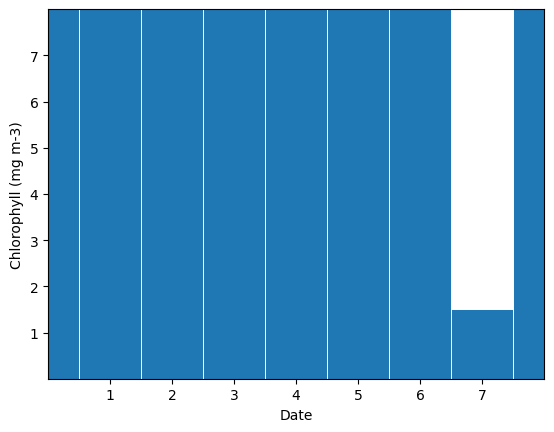